PROJECT SCOPE 


In [126]:
# Evaluate the dataset and perform EDA to find trends and insights 

# Prepare a porfolio for inverstors to determine which industry is profitable to invest in

# Find out what companies took the least amount of time to reach unicorn status 

# Find out average valuations and fundings for periods of interests according to the findings

#find 
# visualize the findings with appropriate charts to report to stakeholders 

In [127]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [128]:
# load the dataset mnnC4I-GRSa5wuCPhjUmvg_8699e4146ad7419d8f5e069340b789f1_Unicorn_Companies (2).csv

df = pd.read_csv('mnnC4I-GRSa5wuCPhjUmvg_8699e4146ad7419d8f5e069340b789f1_Unicorn_Companies (2).csv')

df

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,6/29/17,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,4/18/17,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,5/6/21,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,10/19/21,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [129]:
#removing incorrect values 
df= df[df['Company']!='Yidian Zixun']

In [130]:
#check datatypes 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1073 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1073 non-null   object
 1   Valuation         1073 non-null   object
 2   Date Joined       1073 non-null   object
 3   Industry          1073 non-null   object
 4   City              1057 non-null   object
 5   Country/Region    1073 non-null   object
 6   Continent         1073 non-null   object
 7   Year Founded      1073 non-null   int64 
 8   Funding           1073 non-null   object
 9   Select Investors  1072 non-null   object
dtypes: int64(1), object(9)
memory usage: 92.2+ KB


In [131]:
#remove null values
df=df[df['Funding']!='Unknown']

In [132]:
df['Year Founded']

0       2012
1       2002
2       2008
3       2010
4       2005
        ... 
1069    2012
1070    2015
1071    2018
1072    2005
1073    2014
Name: Year Founded, Length: 1061, dtype: int64

In [133]:
#Int type conversion 

df['Valuation'] = df['Valuation'].astype('str').str.replace('$','').str.replace('B','').astype('int')
df =df.rename(columns={'Valuation':'Valuation in $B'})

In [134]:
#SORTING
#remove duplicate values

df.sort_values(by='Valuation in $B').head(10)

,Company,Valuation in $B,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
1073,Zwift,1,9/16/20,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"
753,Incode Technologies,1,12/7/21,Cybersecurity,San Francisco,United States,North America,2015,$257M,"Dila Capital, Framework Ventures, 3L"
754,Kuaikan Manhua,1,12/1/17,Internet software & services,Beijing,China,Asia,2014,$594M,"Sequoia Capital China, CMC Capital Partners, T..."
755,Marshmallow,1,9/8/21,Fintech,London,United Kingdom,Europe,2017,$116M,"Passion Capital, Hedosophia, Outrun Ventures"
756,Mythical Games,1,11/4/21,Internet software & services,Sherman Oaks,United States,North America,2018,$260M,"Javelin Venture Partners, Struck Capital, Alum..."
757,Route,1,1/21/22,"Supply chain, logistics, & delivery",Lehi,United States,North America,2018,$482M,"Madrona Venture Group, Banner Ventures, FJ Labs"
758,Tackle.io,1,12/21/21,Internet software & services,Boise,United States,North America,2016,$148M,"Andreessen Horowitz, Bessemer Venture Partners..."
759,Nexii,1,9/8/21,Other,Vancouver,Canada,North America,2020,$45M,"Trane Technologies, Honeywell"
760,GalaxySpace,1,11/17/20,Mobile & telecommunications,Beijing,China,Asia,2016,$14M,"Shunwei Capital Partners, 5Y Capital, Legend C..."
761,Insider,1,2/28/22,Internet software & services,Istanbul,Turkey,Europe,2012,$167M,"Wamda Capital, Endeavor, Riverwood Capital"


In [135]:
#number of companies founded each year 
df['Year Founded'].value_counts().to_frame().style.background_gradient()

,count
Year Founded,
2015,154
2016,110
2014,109
2012,94
2013,86
2011,82
2017,73
2018,61
2019,43


In [136]:
#2015 is the year with highest founded companies

In [137]:
#which industry had the most founded companies in that year? 

df_2015 = df[df['Year Founded']==2015]

df_2015['Industry'].value_counts().to_frame().head(5)

,count
Industry,
Fintech,30
Internet software & services,23
E-commerce & direct-to-consumer,21
"Supply chain, logistics, & delivery",14
Health,12


In [138]:
# which were the origin countries ? 

df_2015['Country/Region'].value_counts().to_frame().head(5)

,count
Country/Region,
United States,67
China,35
India,13
Israel,6
Germany,3


Text(0.5, 1.0, 'Distribution of companies based on year they were founded')

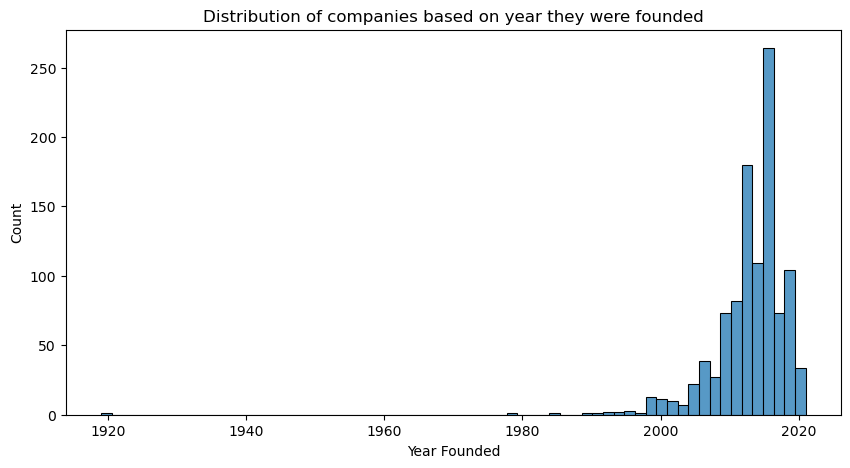

In [139]:
#visualization of this finding 

plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Year Founded')
plt.title('Distribution of companies based on year they were founded')

In [140]:
#number of years it took for the companies to reach unicorn status 
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year Joined'] = df['Date Joined'].dt.year
df['Years took'] = df['Year Joined'].astype('int') - df['Year Founded'].astype('int')

C:\Users\sahil\AppData\Local\Temp\ipykernel_24528\1645222365.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


In [252]:
#companies that took 0 and 1 years to reach unicorn status 

df_companies_0_1 = df[df['Years took'].isin([0, 1])]


In [281]:
df_companies_0_1

,Company,Valuation in $B,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years took
26,Devoted Health,13,2018-10-16,Health,Waltham,United States,North America,2017,2.000,"Andreessen Horowitz, F-Prime Capital, Venrock",2018,1
33,Brex,12,2018-10-05,Fintech,San Francisco,United States,North America,2017,1.000,"DST Global, Ribbit Capital, Greenoaks Capital ...",2018,1
52,Chehaoduo,10,2016-03-12,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,4.000,"Sequoia Capital China, GX Capital",2016,1
78,Hopin,8,2020-11-10,Internet software & services,London,United Kingdom,Europe,2019,1.000,"Accel, Northzone Ventures, Institutional Ventu...",2020,1
94,Scale AI,7,2019-08-05,Artificial intelligence,San Francisco,United States,North America,2018,0.603,"Accel, Y Combinator, Index Ventures",2019,1
102,Black Unicorn Factory,6,2021-05-20,Other,Los Angeles,United States,North America,2020,0.645,Barter Ventures,2021,1
127,Wiz,6,2021-03-17,Cybersecurity,Tel Aviv,Israel,Asia,2020,0.600,"Insight Partners, Sequoia Capital, Index Ventures",2021,1
151,Cerebral,5,2021-06-10,Health,San Francisco,United States,North America,2020,0.462,"Oak HC/FT Partners, Artis Ventures, WestCap Group",2021,1
161,Ola Electric Mobility,5,2019-07-02,Auto & transportation,Bengaluru,India,Asia,2019,0.761,"SoftBank Group, Tiger Global Management, Matri...",2019,0
226,Clubhouse,4,2021-01-24,Mobile & telecommunications,San Francisco,United States,North America,2020,0.110,"Andreessen Horowitz, TQ Ventures",2021,1


In [268]:
#transform funding column

def shape(x):
    x = str(x).strip()

    if x.lower() == 'unknown':
        return None   # or np.nan

    x = x.replace('$', '').replace(',', '')

    if x.endswith('B'):
        return float(x[:-1]*1000)
    elif x.endswith('M'):
        return float(x[:-1]) 
    else:
        return float(x)

df_companies_0_1['Funding'] = df_companies_0_1['Funding'].apply(shape)    

C:\Users\sahil\AppData\Local\Temp\ipykernel_24528\940223294.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_companies_0_1['Funding'] = df_companies_0_1['Funding'].apply(shape)


In [269]:
df_companies_0_1

,Company,Valuation in $B,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years took
26,Devoted Health,13,2018-10-16,Health,Waltham,United States,North America,2017,2.000,"Andreessen Horowitz, F-Prime Capital, Venrock",2018,1
33,Brex,12,2018-10-05,Fintech,San Francisco,United States,North America,2017,1.000,"DST Global, Ribbit Capital, Greenoaks Capital ...",2018,1
52,Chehaoduo,10,2016-03-12,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,4.000,"Sequoia Capital China, GX Capital",2016,1
78,Hopin,8,2020-11-10,Internet software & services,London,United Kingdom,Europe,2019,1.000,"Accel, Northzone Ventures, Institutional Ventu...",2020,1
94,Scale AI,7,2019-08-05,Artificial intelligence,San Francisco,United States,North America,2018,0.603,"Accel, Y Combinator, Index Ventures",2019,1
102,Black Unicorn Factory,6,2021-05-20,Other,Los Angeles,United States,North America,2020,0.645,Barter Ventures,2021,1
127,Wiz,6,2021-03-17,Cybersecurity,Tel Aviv,Israel,Asia,2020,0.600,"Insight Partners, Sequoia Capital, Index Ventures",2021,1
151,Cerebral,5,2021-06-10,Health,San Francisco,United States,North America,2020,0.462,"Oak HC/FT Partners, Artis Ventures, WestCap Group",2021,1
161,Ola Electric Mobility,5,2019-07-02,Auto & transportation,Bengaluru,India,Asia,2019,0.761,"SoftBank Group, Tiger Global Management, Matri...",2019,0
226,Clubhouse,4,2021-01-24,Mobile & telecommunications,San Francisco,United States,North America,2020,0.110,"Andreessen Horowitz, TQ Ventures",2021,1


Text(0.5, 1.0, 'Distribution of Valuation')

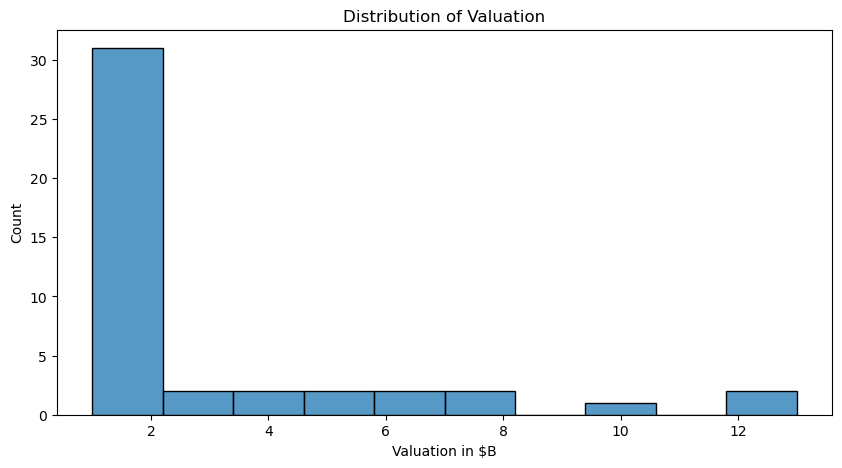

In [285]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_companies_0_1,x=df_companies_0_1['Valuation in $B'])
plt.title('Distribution of Valuation')

Text(0.5, 1.0, 'Distribution of Fundinf')

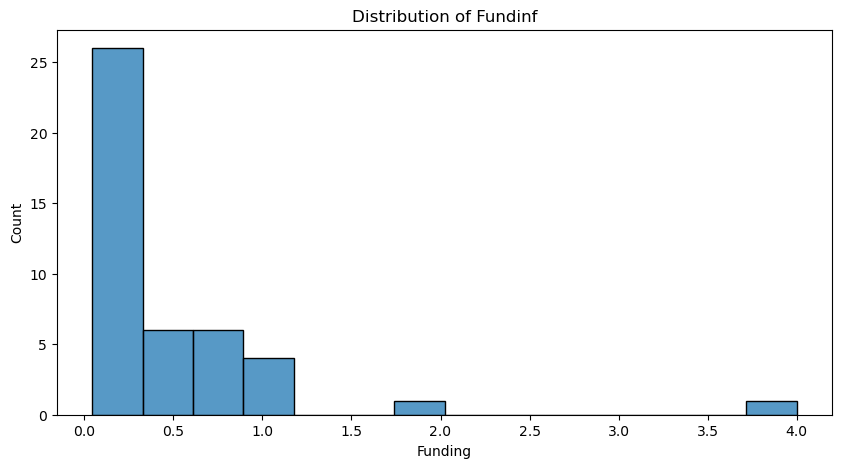

In [286]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_companies_0_1,x=df_companies_0_1['Funding'])
plt.title('Distribution of Fundinf')

Text(0, 0.5, 'Valuation in $B')

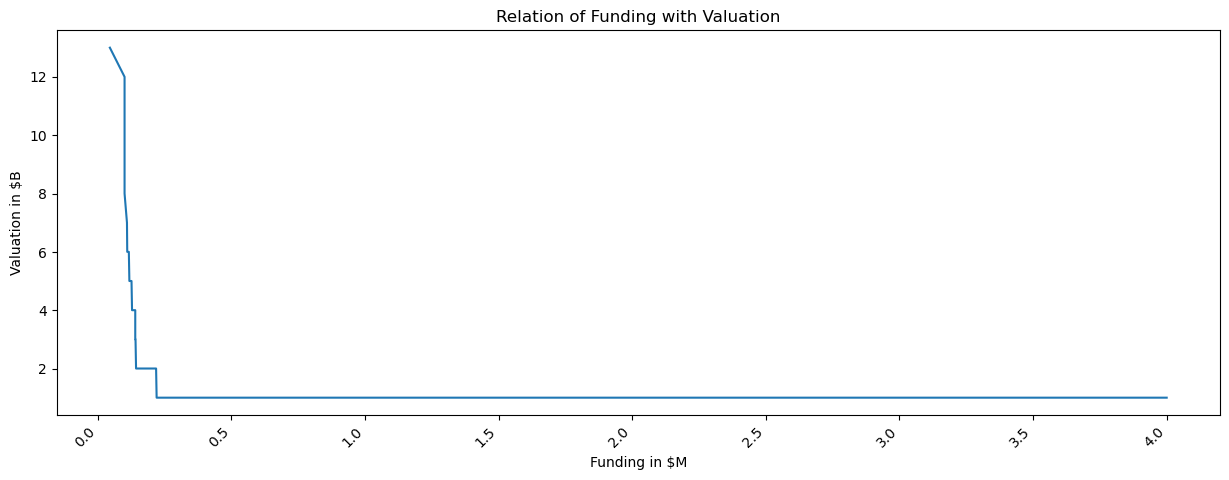

In [273]:
#lets check the relation of valuation and funding 
x=df_companies_0_1['Funding'].sort_values()
plt.figure(figsize=(15,5))
plt.plot(x, df_companies_0_1['Valuation in $B']) 
plt.xticks(rotation=45,horizontalalignment='right')
plt.title('Relation of Funding with Valuation')
plt.xlabel('Funding in $M')
plt.ylabel('Valuation in $B')

In [171]:
#high funding did not necessarily mean higher valuation

In [174]:
df_companies_0_1['Industry'].value_counts().to_frame()

,count
Industry,
E-commerce & direct-to-consumer,8
Fintech,6
Internet software & services,6
Health,4
Artificial intelligence,4
Other,4
Cybersecurity,4
Auto & transportation,2
Mobile & telecommunications,2


In [175]:
#E-commerce & direct-to-consumer is a new field observed that has high ROI


In [279]:
df_companies_0_1[df_companies_0_1['Industry'] == 'E-commerce & direct-to-consumer']['Valuation in $B'].mean()

np.float64(2.75)

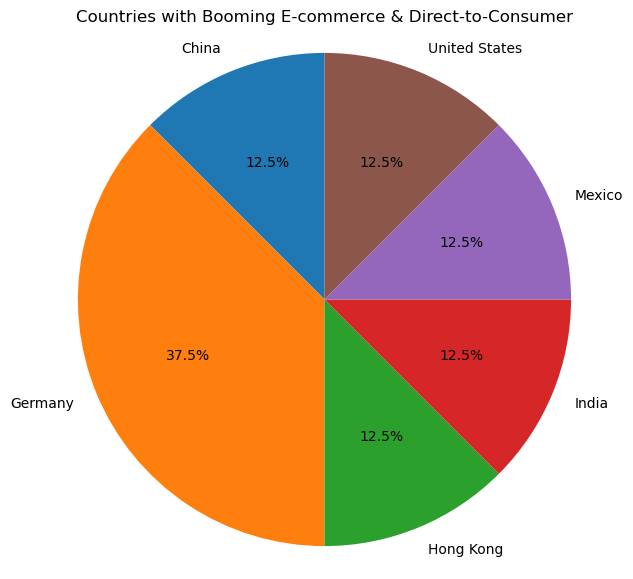

In [202]:
plt.figure(figsize=(7,7))
plt.pie(
    grouped['Company'],
    labels=grouped['Country/Region'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Countries with Booming E-commerce & Direct-to-Consumer')
plt.axis('equal')  # makes it a perfect circle
plt.show()


In [277]:
#German countries are the hub for E-commerce & direct-to-consumer
#average valuation in this sector
df_companies_0_1[df_companies_0_1['Industry'] == 'E-commerce & Direct-to-Consumer']

,Company,Valuation in $B,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years took


In [193]:
#Find which year had the highest conversion rate 

df.value_counts(df['Year Joined']).to_frame().

,count
Year Joined,
2021,513
2022,116
2020,107
2018,103
2019,102
2017,43
2015,35
2016,20
2014,13


In [196]:
#the year is 2021, research everything in 2021

df_2021=df[df['Year Joined']==2021]

df_2021

,Company,Valuation in $B,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years took
12,FTX,32,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,3
16,J&T Express,20,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",2021,6
24,Blockchain.com,14,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",2021,10
27,OpenSea,13,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2021,4
34,Getir,12,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",2021,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,XForcePlus,1,2021-06-01,Internet software & services,Shanghai,China,Asia,2015,$200M,"Eastern Bell Capital, Danhua Capital, MSA Capital",2021,6
1067,YipitData,1,2021-12-06,Internet software & services,New York,United States,North America,2008,$492M,"RRE Ventures+, Highland Capital Partners, The ...",2021,13
1068,Yunxuetang,1,2021-03-29,Edtech,Suzhou,China,Asia,2011,$389M,"Matrix Partners China, Sequoia Capital China, ...",2021,10
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021,3


In [209]:
#what was the average timeframe for conversion

v=df_2021['Years took'].mean()
float(round(v,2))

6.79

In [240]:
df_2021.sort_values(by='Valuation in $B')

,Company,Valuation in $B,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years took
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021,16
798,Modern Health,1,2021-02-11,Health,San Francisco,United States,North America,2017,$167M,"Kleiner Perkins Caufield & Byers, Afore Capita...",2021,4
797,IRL,1,2021-06-15,Internet software & services,San Francisco,United States,North America,2017,$197M,"Goodwater Capital, Floodgate, Founders Fund",2021,4
791,UpGrad,1,2021-08-09,Edtech,Mumbai,India,Asia,2015,$194M,"Qualcomm Ventures, Accel, Canaan Partners",2021,6
790,Tealium,1,2021-02-03,Internet software & services,San Diego,United States,North America,2008,$264M,"Georgian Partners, Silver Lake, Presidio Ventures",2021,13
...,...,...,...,...,...,...,...,...,...,...,...,...
34,Getir,12,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",2021,6
27,OpenSea,13,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2021,4
24,Blockchain.com,14,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",2021,10
16,J&T Express,20,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",2021,6


In [211]:
#Average valuation of companies 

float(round(df['Valuation in $B'].mean(),2))

3.48

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Artificial Intelligence'),
  Text(1, 0, 'Artificial intelligence'),
  Text(2, 0, 'Auto & transportation'),
  Text(3, 0, 'Consumer & retail'),
  Text(4, 0, 'Cybersecurity'),
  Text(5, 0, 'Data management & analytics'),
  Text(6, 0, 'E-commerce & direct-to-consumer'),
  Text(7, 0, 'Edtech'),
  Text(8, 0, 'Fintech'),
  Text(9, 0, 'Hardware'),
  Text(10, 0, 'Health'),
  Text(11, 0, 'Internet software & services'),
  Text(12, 0, 'Mobile & telecommunications'),
  Text(13, 0, 'Other'),
  Text(14, 0, 'Supply chain, logistics, & delivery'),
  Text(15, 0, 'Travel')])

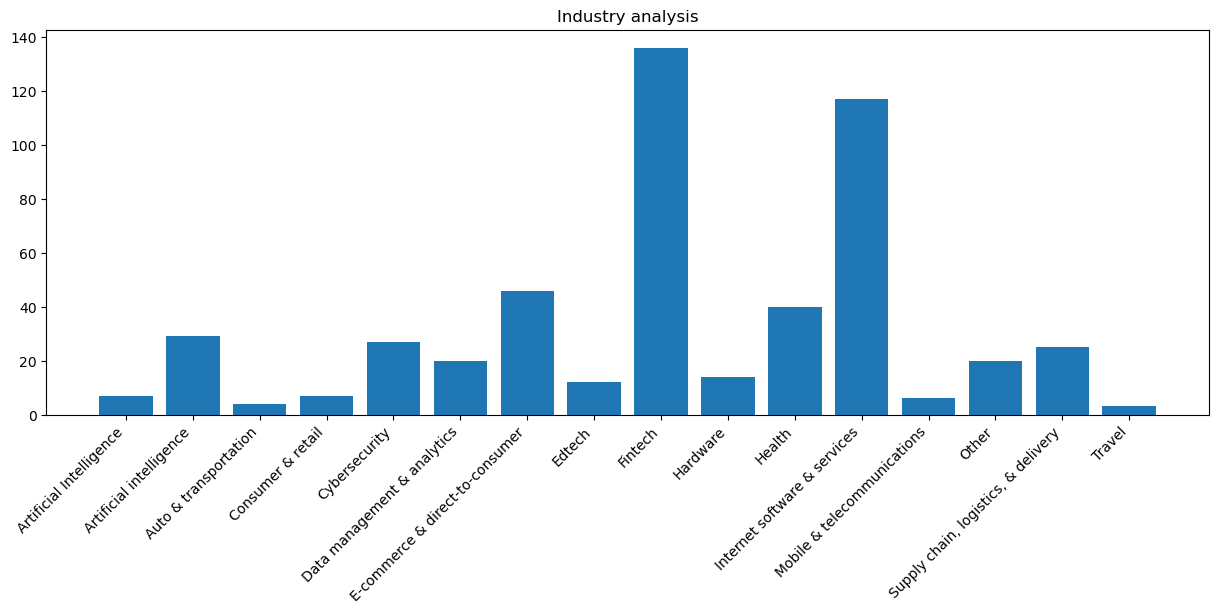

In [214]:
#Geospatial analysis
grouping_2021 = df_2021.groupby('Industry')['Company'].count().reset_index()
plt.figure(figsize=(15,5))
plt.bar(grouping_2021['Industry'],grouping_2021['Company'])
plt.title('Industry analysis')
plt.xticks(rotation =45,horizontalalignment='right')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'Oceania'),
  Text(5, 0, 'South America')])

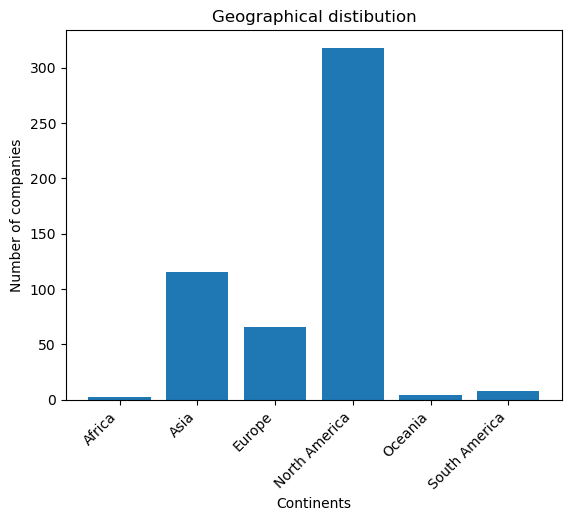

In [232]:
new_group = df_2021.groupby('Continent')['Company'].count().reset_index()
plt.bar(new_group['Continent'],new_group['Company'])
plt.title('Geographical distibution')
plt.xlabel('Continents')
plt.ylabel('Number of companies')
plt.xticks(rotation =45, horizontalalignment='right')

In [233]:
#north america is dominant, europe and asia are promising


In [236]:
df_2021[df_2021['Continent']=='North America']

,Company,Valuation in $B,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years took
12,FTX,32,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,3
27,OpenSea,13,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2021,4
37,GoodLeap,12,2021-10-13,Internet software & services,Roseville,United States,North America,2003,$800M,"New Enterprise Associates, BDT Capital Partner...",2021,18
44,Bolt,11,2021-10-08,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic",2021,7
51,Alchemy,10,2021-10-28,Fintech,San Francisco,United States,North America,2017,$564M,"DFJ Growth Fund, Coatue Management, Addition",2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Vise,1,2021-05-18,Fintech,New York,United States,North America,2016,$128M,"Sequoia Capital, Founders Fund, Bling Capital",2021,5
1055,Visier,1,2021-06-29,Internet software & services,Vancouver,Canada,North America,2010,$217M,"Foundation Capital, Summit Partners, Adams Str...",2021,11
1060,Weights & Biases,1,2021-10-13,Internet software & services,San Francisco,United States,North America,2017,$200M,"Coatue Management, Insight Partners, Trinity V...",2021,4
1063,Wrapbook,1,2021-11-10,Fintech,New York,United States,North America,2018,$131M,"Equal Ventures, Uncork Capital, Andreessen Hor...",2021,3


In [308]:
df_2021.sort_values(by='Year Founded', ascending=True)
valuation_growth= ((df_2021['Valuation in $B'].iloc[0] ** (1 / df_2021['Valuation in $B'].iloc[-1])) - 1) 


0.41421356237309515

In [309]:
df_2021.sort_values(by='Year Founded', ascending=True)

,Company,Valuation in $B,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years took,Valuation_Growth_%
699,Five Star Business Finance,1,2021-03-26,Other,Chennai,India,Asia,1984,$456M,"Sequoia Capital India, Tiger Global Management...",2021,37,31.0
1043,Thirty Madison,1,2021-06-02,Health,New York,United States,North America,1993,$210M,"Northzone Ventures, Maveron, Johnson & Johnson...",2021,28,31.0
79,Caris Life Sciences,8,2021-05-12,Health,Irving,United States,North America,1996,$1B,"Sixth Street Partners, OrbiMed Advisors, Highl...",2021,25,31.0
42,Weilong Foods,11,2021-05-08,Consumer & retail,Luohe,China,Asia,1999,$558M,"Tencent Holdings, Hillhouse Capital Management...",2021,22,31.0
284,Starburst,3,2021-01-06,Data management & analytics,Boston,United States,North America,1999,$414M,"Index Ventures, Coatue Management, Andreessen ...",2021,22,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,ClickHouse,2,2021-10-28,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par...",2021,0,31.0
396,candy.com,2,2021-10-21,Fintech,New York,United States,North America,2021,$100M,"Insight Partners, Softbank Group, Connect Vent...",2021,0,31.0
775,Jokr,1,2021-12-02,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft",2021,0,31.0
822,GlobalBees,1,2021-12-28,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca...",2021,0,31.0


In [306]:
one=df_companies_0_1.sort_values(by='Year Founded',ascending=True)
one['Valuation_Growth_%'] = ((one['Valuation in $B'].iloc[0] ** (1 / one['Valuation in $B'].iloc[-1])) - 1 ) *100

one

,Company,Valuation in $B,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years took,Valuation_Growth_%
546,Avant,2,2012-12-17,Artificial intelligence,Chicago,United States,North America,2012,0.658,"RRE Ventures, Tiger Global, August Capital",2012,0,41.421356
667,Apus Group,1,2015-01-16,Mobile & telecommunications,Beijing,China,Asia,2014,0.116,"Redpoint Ventures, QiMing Venture Partners, Ch...",2015,1,41.421356
491,Uptake,2,2015-10-27,Artificial intelligence,Chicago,United States,North America,2014,0.218,"Revolution, New Enterprise Associates, Caterpi...",2015,1,41.421356
854,58 Daojia,1,2015-10-12,Internet software & services,Beijing,China,Asia,2014,0.300,"KKR, Alibaba Group, Ping An Insurance",2015,1,41.421356
52,Chehaoduo,10,2016-03-12,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,4.000,"Sequoia Capital China, GX Capital",2016,1,41.421356
938,iCarbonX,1,2016-04-12,Artificial intelligence,Shenzhen,China,Asia,2015,0.200,"Tencent, Vcanbio",2016,1,41.421356
498,AIWAYS,2,2018-04-16,Auto & transportation,Shanghai,China,Asia,2017,0.792,"Jiangsu Sha Steel Group, Shanghai Puyin Indust...",2018,1,41.421356
26,Devoted Health,13,2018-10-16,Health,Waltham,United States,North America,2017,2.000,"Andreessen Horowitz, F-Prime Capital, Venrock",2018,1,41.421356
33,Brex,12,2018-10-05,Fintech,San Francisco,United States,North America,2017,1.000,"DST Global, Ribbit Capital, Greenoaks Capital ...",2018,1,41.421356
94,Scale AI,7,2019-08-05,Artificial intelligence,San Francisco,United States,North America,2018,0.603,"Accel, Y Combinator, Index Ventures",2019,1,41.421356


# INSIGHTS AND FINDINGS


1. 2015 is the year with highest founded companies
2. Fintech(30) & Internet software & services (23) were the industries where the companies were founded
3. The countries of origin were United States(67) & China(35)
4. Companies that reached unicorn status in 1/0 year have a non-linear relationship between funding and valuation, i.e High funding does not mean high valuation
5. In these findings, E-commerce industry has the highest number of companies to reach unicorn status in 0/1 year, with 26 companies joining in 2021
6. Germany occupies 37.5% of this sector.
7. The average valuation in this sector is 2.75 billion dollars
8. In the year 2021, the highest number of companies joined unicorn status (513).
9. The average time required for unicorn status conversion in this year was 6.7 years.
10. The average valuation of companies was $3.4B
11. Fintech and Internet software & services industries had the most conversion.
12. North america is dominant, Europe and Asia are promising

# Advice to stakeholders

1. Fintech and Internet software & services are ever lasting industries safe for investment opportunites. 

2. E-commerce industry is also a safe bet, showing steady annual growth of 41% 

3. Germany, United States and China are key markets for profitable companies. 

4. Mexico, China and India are promising opportunities that will require time. 